Data comes from 
[here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)

In [ ]:
!pip install disjoint-set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.neighbors import BallTree
from disjoint_set import DisjointSet

In [ ]:
images_path = '/content/drive/MyDrive/Colab Notebooks/UTEC - IA/data/dataset_cluster/brain_tumor_dataset'

In [ ]:
def load_images_from_folder(folder, gray = True):
    images = []
    for filename in os.listdir(folder):
      if gray:
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
      else:
        img = cv2.imread(os.path.join(folder,filename))
      if img is not None:
        images.append(img)
    return images

images_yes = load_images_from_folder( images_path + "/yes", )
images_no = load_images_from_folder( images_path + "/no")

In [ ]:
def transform_image(image):
  row = image.shape[0]
  col = image.shape[1]
  new_image = []
  color = True if len(image.shape) > 2 else False
  for i in range(row):
    row_i = []
    for j in range(col):
      if color:
        new_image.append([image[i][j][0], image[i][j][1], image[i][j][2]])
      else:
        #return image.flatten()
        new_image.append([image[i][j]])
  new_image = np.array(new_image)
  return new_image

In [ ]:
tmp = transform_image(images_yes[0])
tmp.shape, images_yes[0].shape, images_no[0].shape

((97500, 3), (325, 300, 3), (201, 173))

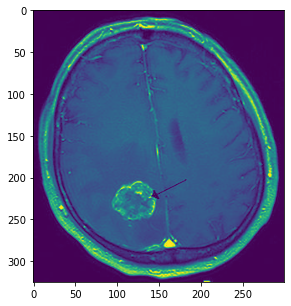

In [ ]:
plt.figure(figsize = (5, 5))
plt.imshow(images_yes[0])
plt.show()

In [ ]:
def dist(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

In [ ]:
img_trans[0].shape[0]

1

In [ ]:
def get_centroids(image, row, col, radio = 10, threshold = 2, verbose = True):
  print("GET Centroids")
  tree = BallTree(np.array(image))
  size_img = row * col
  cent_image = []
  for  i in range(size_img):
    if i % 10000 == 0 and verbose:
      print("Indice:", i)
      print("===========================================================================================")
    cent_cur = np.ones(image[0].shape[0])*-100
    cent_new = image[i:i+1][0]
    while dist(cent_new, cent_cur) >= threshold:
      cent_cur = cent_new.copy()
      nn = tree.query_radius([cent_cur], r = radio)
      nn = nn[0]
      cent_new = np.sum(image[nn], axis = 0) / len(nn)
      #print("Indice:", i, " //  Cent:", cent_new)
    cent_image.append(cent_new)
  return np.array(cent_image)

def mean_shift(image, row, col, centroids, radio = 10, threshold = 2, verbose = True, ):
  cent_image = centroids
  tree_colour = BallTree(cent_image)
  ds = DisjointSet()
  size_img = row * col
  for i in range(size_img):
    if i % 100 == 0 and verbose:
      print("Indice:", i)
      print("===========================================================================================")
    cent_i = cent_image[i:i+1]
    nn_dist = tree_colour.query_radius(cent_i, r = threshold)[0]
    
    if (len(nn_dist) > 0):
      for nn_i in nn_dist:
        ds.union(i, nn_i)
  cluster = np.ones((row, col)) * -1
  count_col = 0
  for i in range(size_img):
    if i % 10000 == 0 and verbose:
      print("Indice:", i)
      print("===========================================================================================")
    par = ds.find(i)
    row_par = par/row 
    col_par = par%col
    row_ch = i/row 
    col_ch = i%col
    if cluster[row_par][col_par] == -1:
      count_col += 10
      cluster[row_par][col_par] = count_col
    cluster[row_ch][col_ch] = cluster[row_par][col_par]
  return cluster
  '''
  return 0
  #'''

In [ ]:
from collections import defaultdict
d1 = defaultdict(float)
d1[1] = 3
d1[1] == 0

False

In [ ]:
from collections import defaultdict
def mean_shift2(image, row, col, centroids, radio = 10, threshold = 2, verbose = True):
  size_img = row * col
  cluster = np.ones((row, col)) * -1
  d = defaultdict(float)
  count_col = 0
  for i in range(size_img):
    if i % 10000 == 0 and verbose:
      print("Indice:", i)
      print("===========================================================================================")
    index = centroids.item(i)
    if d[index] == 0:
      count_col += 1
      d[index] = count_col
    row_i = int(i / row)
    col_i = int(i % col)
    cluster[row_i][col_i] = d[index]
    
  return cluster

In [ ]:
#np.sort(np.unique(cent))
diff = 1000
x = np.sort(cent, axis = 0)
for i in range(1, len(x)):
  d_i = x[i] - x[i - 1]
  if d_i != 0:
    diff = min(diff, d_i)
diff


array([0.74977778])

In [ ]:
#img_trans = transform_image(images_yes[0])
cent = get_centroids(img_trans, images_yes[0].shape[0], images_yes[0].shape[1], radio=8, threshold=1e-8)
tmp2 = mean_shift2(img_trans, images_yes[0].shape[0], images_yes[0].shape[1], cent, radio=4, threshold= 1e-8)
'''
plt.figure(figsize = (10, 10))  

plt.subplot(2, 2, 1)
plt.imshow(tmp2)

plt.subplot(2, 2, 2)
plt.imshow(images_yes[0])

'''

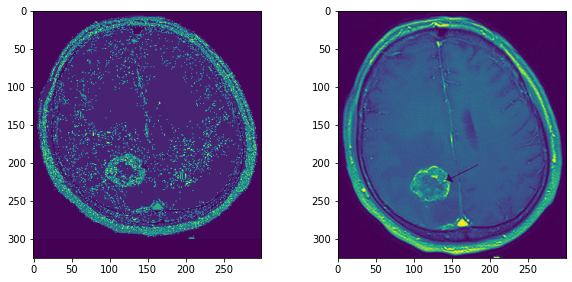

In [ ]:
plt.figure(figsize = (10, 10))  

plt.subplot(2, 2, 1)
plt.imshow(tmp2)

plt.subplot(2, 2, 2)
plt.imshow(images_yes[0])


In [ ]:
img_trans_no = transform_image(images_no[0])
cent2 = get_centroids(img_trans_no, images_no[0].shape[0], images_no[0].shape[1], radio=8, threshold=1e-8)
tmp_no = mean_shift2(img_trans_no, images_no[0].shape[0], images_no[0].shape[1], cent2, radio=4, threshold=0)

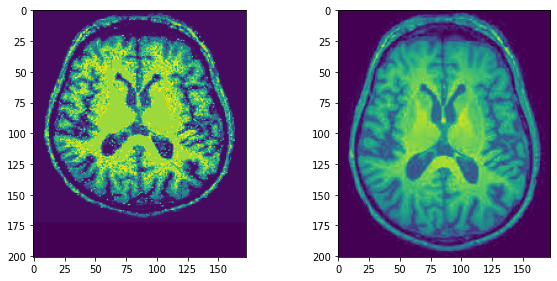

In [ ]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(tmp_no)

plt.subplot(2, 2, 2)  
plt.imshow(images_no[0])


In [ ]:
tmp_img = images_yes[1]
#img_trans2 = transform_image(tmp_img)
#cent22 = get_centroids(img_trans2, tmp_img.shape[0], tmp_img.shape[1], radio=8, threshold=1e-8)
tmp_yes2 = mean_shift2(img_trans2, tmp_img.shape[0], tmp_img.shape[1],cent22, radio=4, threshold= 1e-8)

plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(tmp_yes2)

plt.subplot(2, 2, 2)
plt.imshow(tmp_img)


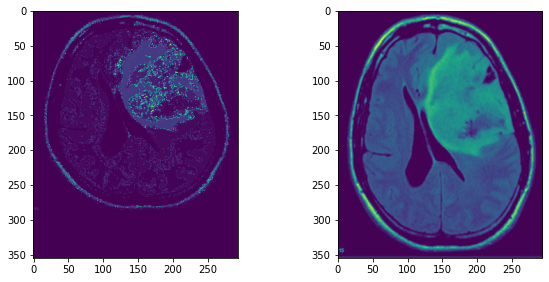

In [ ]:
tmp33 = np.power(tmp_yes2, 3)

plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(tmp33)

plt.subplot(2, 2, 2)
plt.imshow(tmp_img)

